### 순차데이터
- 텍스트데이터(ex: I am a boy) : 순서에 의미가 있다.
- 시계열데이터(ex: 1일 10도, 2일 8도) 

---
### 순환신경망(RNN : Recurrent Neural Network)

![](../data/RNN.png)

![](../data/token.png)

### IMDB(Internet Movie Data Base)
- IMDB 구성 : Train Data(25000개 중 긍정 12500개, 부정 12500개), Test Data(25000개 중 긍정 12500, 부정 12500)
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝이나 딥러닝에서는 데이터가 숫자로 구성되어야 하므로 이런 단어들을 고유한 번호로 할당하여 사용한다.

In [1]:
from tensorflow import keras

In [3]:
imdb = keras.datasets.imdb

In [5]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개 단어

17464789/17464789 [==============================] - 169s 10us/step


In [6]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [7]:
# train의 첫번째 문장의 token 수
len(train_input[0])

218

In [8]:
len(train_input[1])

189

In [9]:
# 첫번째 댓글 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다.   
- 2는 선정한 단어 개수에 포함되지 않는 단어를 표현한다.   
- train_input 자체는 numpy 배열이지만, 댓글에 사용된 토큰수가 다르기 때문에 numpy 배열을 사용하지 못하고 python list를 사용한다.

In [10]:
# train의 target 출력
print(train_target[:10])

[1 0 0 1 0 0 1 0 1 0]


In [11]:
# 훈련셋 준비
from sklearn.model_selection import train_test_split

In [12]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [13]:
# 각 리뷰마다 문장 길이를 시각화
import numpy as np

In [14]:
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


In [15]:
import matplotlib.pyplot as plt

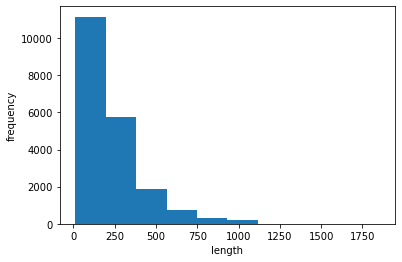

In [16]:
plt.hist(lengths)

plt.xlabel('length')
plt.ylabel('frequency')

plt.show()

---
### Sequence Padding
- 전체 자리수를 100으로 가정했을 때, 한 문장에 3개 토큰만 있을 경우 나머지 97개는 비우고 이를 0으로 채우는 과정

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 위의 차트에서 100개 부분이 제일 많은 것 같아서 100개의 토큰만 사용
val_seq = pad_sequences(val_input, maxlen=100) # 검증 데이터

In [18]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련셋 중 5000개는 검증셋으로 빠짐

In [20]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [21]:
# 원본 첫번째 댓글의 마지막 10개 토큰만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [22]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
### 순환신경망 모델 만들기

In [23]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 8 : cells, 500 : one hot encoding
model.add(keras.layers.Dense(1, activation='sigmoid'))

2022-07-22 11:13:15.403653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# one hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [26]:
# one hot encoding 확인
print(np.sum(train_oh[0][0]))

1.0


In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


> 9 = 8 + 1    
4072 = 500 * 8 + (8 * 8)

In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_simple_rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True,
)

history = model.fit(
    train_oh,
    train_target,
    epochs=100, # rnn에서 최소 100개
    batch_size=64, # mini batch 경사 하강법. 시간을 줄여보자! (8*8)
    validation_data=(val_oh, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 16s 47ms/step - loss: 0.7049 - accuracy: 0.4943 - val_loss: 0.6997 - val_accuracy: 0.5012
Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6987 - accuracy: 0.5060 - val_loss: 0.6959 - val_accuracy: 0.5136
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6941 - accuracy: 0.5192 - val_loss: 0.6928 - val_accuracy: 0.5230
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6901 - accuracy: 0.5346 - val_loss: 0.6898 - val_accuracy: 0.5350
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6857 - accuracy: 0.5508 - val_loss: 0.6851 - val_accuracy: 0.5528
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6778 - accuracy: 0.5799 - val_loss: 0.6724 - val_accuracy: 0.5950
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6435 - accuracy: 0.6457 - val_loss: 0.6314 - val_ac

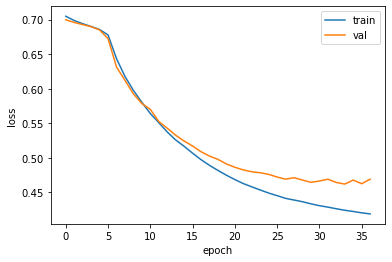

In [34]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [36]:
model.evaluate(val_oh, val_target)

157/157 [==============================] - 3s 16ms/step - loss: 0.4622 - accuracy: 0.7842


[0.4621654152870178, 0.7842000126838684]

In [38]:
# test data sequence & one hot encoding
test_seq = pad_sequences(test_input, maxlen=100) # 위의 차트에서 100개 부분이 제일 많은 것 같아서 100개의 토큰만 사용
test_oh = keras.utils.to_categorical(test_seq)

In [39]:
model.evaluate(test_oh, test_target)

782/782 [==============================] - 14s 17ms/step - loss: 0.4619 - accuracy: 0.7866


[0.46193528175354004, 0.7865999937057495]

---
### LSTM(Long Short Term Memory) 모델 구성하기
- 순환신경망의 셀로 이전 timestep의 sample을 기억하고 있음

In [40]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) # Embedding() : one hot encoding
model.add(keras.layers.LSTM(8)) # 8: cells
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


> parameter 수가 늘었다. timestep을 기억하기 때문

In [43]:
# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_lstm_rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True, # 최적 weight 기억해둬야 stop 후 해당 값을 출력한다.
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100, # rnn에서 최소 100개
    batch_size=64, # mini batch 경사 하강법. 시간을 줄여보자! (8*8)
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 34ms/step - loss: 0.6923 - accuracy: 0.5355 - val_loss: 0.6909 - val_accuracy: 0.5884
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6883 - accuracy: 0.6046 - val_loss: 0.6846 - val_accuracy: 0.6442
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6745 - accuracy: 0.6701 - val_loss: 0.6555 - val_accuracy: 0.7028
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6017 - accuracy: 0.7161 - val_loss: 0.5672 - val_accuracy: 0.7192
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5469 - accuracy: 0.7369 - val_loss: 0.5393 - val_accuracy: 0.7378
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5217 - accuracy: 0.7560 - val_loss: 0.5192 - val_accuracy: 0.7574
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5030 - accuracy: 0.7696 - val_loss: 0.5033 - val_ac

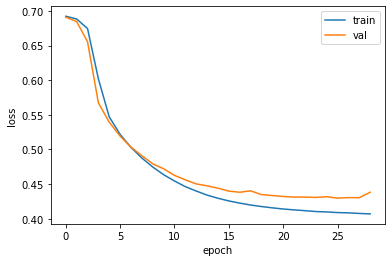

In [44]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

> simple rnn 보다 lstm이 더 오차(격차)가 적어졌다.

---
### 순환층에 dropout 적용

In [46]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) # Embedding() : one hot encoding
model.add(keras.layers.LSTM(8, dropout=0.3)) # 8: cells, dropout: 30%, 문장을 덜 가져오는 것.
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_lstm_dropout_rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True, # 최적 weight 기억해둬야 stop 후 해당 값을 출력한다.
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100, # rnn에서 최소 100개
    batch_size=64, # mini batch 경사 하강법. 시간을 줄여보자! (8*8)
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 15s 36ms/step - loss: 0.6926 - accuracy: 0.5242 - val_loss: 0.6921 - val_accuracy: 0.5504
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6910 - accuracy: 0.5780 - val_loss: 0.6900 - val_accuracy: 0.5964
Epoch 3/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6879 - accuracy: 0.6147 - val_loss: 0.6858 - val_accuracy: 0.6272
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6809 - accuracy: 0.6423 - val_loss: 0.6758 - val_accuracy: 0.6434
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6587 - accuracy: 0.6538 - val_loss: 0.6355 - val_accuracy: 0.6430
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5998 - accuracy: 0.7081 - val_loss: 0.5820 - val_accuracy: 0.7362
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5660 - accuracy: 0.7384 - val_loss: 0.5555 - val_accu

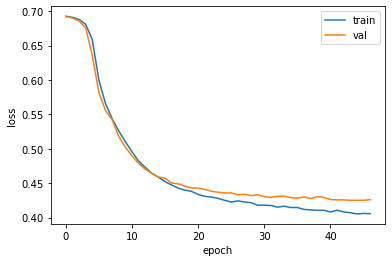

In [48]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

---
### 2개 층을 연결해보자

In [49]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) # Embedding() : one hot encoding
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 8: cells, dropout: 30%, 문장을 덜 가져오는 것.
# return_sequences=True가 있어야 타임스텝의 순서를 가지고 문장으로 인식한다.
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_lstm_2rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True, # 최적 weight 기억해둬야 stop 후 해당 값을 출력한다.
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100, # rnn에서 최소 100개
    batch_size=64, # mini batch 경사 하강법. 시간을 줄여보자! (8*8)
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 25s 67ms/step - loss: 0.6926 - accuracy: 0.5385 - val_loss: 0.6919 - val_accuracy: 0.5968
Epoch 2/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6898 - accuracy: 0.6036 - val_loss: 0.6858 - val_accuracy: 0.6490
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6694 - accuracy: 0.6575 - val_loss: 0.6372 - val_accuracy: 0.6898
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5988 - accuracy: 0.7081 - val_loss: 0.5758 - val_accuracy: 0.7210
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5598 - accuracy: 0.7344 - val_loss: 0.5484 - val_accuracy: 0.7428
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5403 - accuracy: 0.7448 - val_loss: 0.5283 - val_accuracy: 0.7538
Epoch 7/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5209 - accuracy: 0.7599 - val_loss: 0.5135 - val_ac

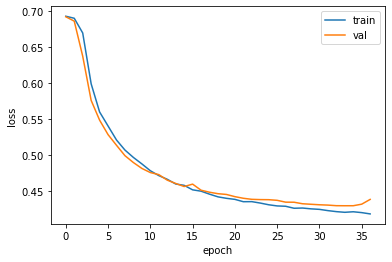

In [51]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

---
### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전

In [52]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) # Embedding() : one hot encoding
model.add(keras.layers.GRU(8)) # 8: cells, dropout 필요없다. 알아서 줄여주기 때문
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


> LSTM 800개일 때 GRU는 624개이다.

In [53]:
# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_GRU_rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True, # 최적 weight 기억해둬야 stop 후 해당 값을 출력한다.
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100, # rnn에서 최소 100개
    batch_size=64, # mini batch 경사 하강법. 시간을 줄여보자! (8*8)
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 34ms/step - loss: 0.6924 - accuracy: 0.5211 - val_loss: 0.6914 - val_accuracy: 0.5426
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6901 - accuracy: 0.5652 - val_loss: 0.6886 - val_accuracy: 0.5822
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6863 - accuracy: 0.5979 - val_loss: 0.6839 - val_accuracy: 0.5982
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6794 - accuracy: 0.6149 - val_loss: 0.6755 - val_accuracy: 0.6176
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6674 - accuracy: 0.6316 - val_loss: 0.6608 - val_accuracy: 0.6380
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6466 - accuracy: 0.6534 - val_loss: 0.6342 - val_accuracy: 0.6656
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6073 - accuracy: 0.6879 - val_loss: 0.5821 - val_ac

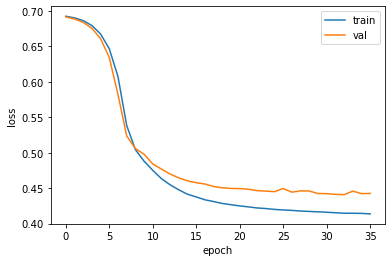

: 

In [54]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

> model 사이즈가 줄었다.